In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [2]:
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA

from tkinter import filedialog
from tkinter import *

def browse_button():
    # Allow user to select a directory and store it in global var
    # called folder_path
    global folder_path
    filename = filedialog.askopenfile()
    folder_path.set(filename)
    print(filename)
    return filename


root = Tk()
folder_path = StringVar()
lbl1 = Label(master=root,textvariable=folder_path)
lbl1.grid(row=0, column=1)
button2 = Button(text="Browse", command=browse_button)
button2.grid(row=0, column=3)

x = browse_button()
mainloop()


<_io.TextIOWrapper name='D:/Python/upwork/Gas Chamber Project/Dataset_forcode_v1.xlsx' mode='r' encoding='cp1252'>


In [3]:
df = pd.read_excel(x.name)

In [4]:
df.head()

,22VD1.Sollwert_Hand_in_Prozent Time,Unnamed: 1,12S1-T1 ValueY,22F1_T1 ValueY,22F2_T1 ValueY,22F3_T1 ValueY,22LUVO_T1 ValueY,22F1_in_Nm³/h ValueY,22F3_in_Nm³/h ValueY,12S1_Massenstrom_in_kg_pro_h ValueY,...,21WS-T7 ValueY,21WS-T8 ValueY,21WS-T9 ValueY,21WS-T10 ValueY,21WS-T11 ValueY,21WS-T12 ValueY,21WS-T13 ValueY,21WS-T14 ValueY,82_Gasanalyse_CO in Vol-% ValueY,82_Gasanalyse_O2 in Vol-% ValueY
0,2014-10-06 06:11:22,1,15.933334,17.520000,17.666667,17.2,16.520001,0.163060,22.512803,0.0,...,24.266667,23.853334,23.800000,29.866668,29.866668,30.500002,30.833335,21.966667,0.021564,20.965331
1,2014-10-06 06:11:37,2,9.400001,11.513333,11.960000,11.2,13.000000,0.166406,13.967621,0.0,...,15.400001,15.000000,15.200000,16.400000,16.400000,16.300001,16.700001,13.220000,0.024534,20.904316
2,2014-10-06 06:11:52,3,9.400001,11.500000,11.826667,11.2,12.906667,0.166407,13.967621,0.0,...,15.420000,15.000000,15.200000,16.400000,16.400000,16.300001,16.700001,13.200000,0.024914,20.908484
3,2014-10-06 06:12:07,4,9.400001,11.500000,11.806667,11.2,12.900001,0.166396,13.967621,0.0,...,15.433334,15.000000,15.200000,16.400000,16.400000,16.300001,16.700001,13.200000,0.025413,20.909970
4,2014-10-06 06:12:22,5,9.400001,11.500000,11.800000,11.2,12.900001,30.754719,13.967621,0.0,...,15.453334,14.926667,15.106667,16.400000,16.400000,16.300001,16.700001,13.233333,0.023842,20.913345


In [5]:
df.columns

Index(['22VD1.Sollwert_Hand_in_Prozent Time', 'Unnamed: 1', '12S1-T1 ValueY',
       '22F1_T1 ValueY', '22F2_T1 ValueY', '22F3_T1 ValueY',
       '22LUVO_T1 ValueY', '22F1_in_Nm³/h ValueY', '22F3_in_Nm³/h ValueY',
       '12S1_Massenstrom_in_kg_pro_h ValueY',
       'Lambda_Primaerluft_berechnet ValueY',
       'Lambda_Sekundaerluft_berechnet ValueY', '21WS-T1 ValueY',
       '21WS-T2 ValueY', '21WS-T3 ValueY', '21WS-T4 ValueY', '21WS-T5 ValueY',
       '21WS-T6 ValueY', '21WS-T7 ValueY', '21WS-T8 ValueY', '21WS-T9 ValueY',
       '21WS-T10 ValueY', '21WS-T11 ValueY', '21WS-T12 ValueY',
       '21WS-T13 ValueY', '21WS-T14 ValueY',
       '82_Gasanalyse_CO in Vol-% ValueY', '82_Gasanalyse_O2 in Vol-% ValueY'],
      dtype='object')

In [6]:
df = df.rename(columns={"Unnamed: 1" : "Time"})

In [7]:
df.columns

Index(['22VD1.Sollwert_Hand_in_Prozent Time', 'Time', '12S1-T1 ValueY',
       '22F1_T1 ValueY', '22F2_T1 ValueY', '22F3_T1 ValueY',
       '22LUVO_T1 ValueY', '22F1_in_Nm³/h ValueY', '22F3_in_Nm³/h ValueY',
       '12S1_Massenstrom_in_kg_pro_h ValueY',
       'Lambda_Primaerluft_berechnet ValueY',
       'Lambda_Sekundaerluft_berechnet ValueY', '21WS-T1 ValueY',
       '21WS-T2 ValueY', '21WS-T3 ValueY', '21WS-T4 ValueY', '21WS-T5 ValueY',
       '21WS-T6 ValueY', '21WS-T7 ValueY', '21WS-T8 ValueY', '21WS-T9 ValueY',
       '21WS-T10 ValueY', '21WS-T11 ValueY', '21WS-T12 ValueY',
       '21WS-T13 ValueY', '21WS-T14 ValueY',
       '82_Gasanalyse_CO in Vol-% ValueY', '82_Gasanalyse_O2 in Vol-% ValueY'],
      dtype='object')

In [8]:
df.head()

,22VD1.Sollwert_Hand_in_Prozent Time,Time,12S1-T1 ValueY,22F1_T1 ValueY,22F2_T1 ValueY,22F3_T1 ValueY,22LUVO_T1 ValueY,22F1_in_Nm³/h ValueY,22F3_in_Nm³/h ValueY,12S1_Massenstrom_in_kg_pro_h ValueY,...,21WS-T7 ValueY,21WS-T8 ValueY,21WS-T9 ValueY,21WS-T10 ValueY,21WS-T11 ValueY,21WS-T12 ValueY,21WS-T13 ValueY,21WS-T14 ValueY,82_Gasanalyse_CO in Vol-% ValueY,82_Gasanalyse_O2 in Vol-% ValueY
0,2014-10-06 06:11:22,1,15.933334,17.520000,17.666667,17.2,16.520001,0.163060,22.512803,0.0,...,24.266667,23.853334,23.800000,29.866668,29.866668,30.500002,30.833335,21.966667,0.021564,20.965331
1,2014-10-06 06:11:37,2,9.400001,11.513333,11.960000,11.2,13.000000,0.166406,13.967621,0.0,...,15.400001,15.000000,15.200000,16.400000,16.400000,16.300001,16.700001,13.220000,0.024534,20.904316
2,2014-10-06 06:11:52,3,9.400001,11.500000,11.826667,11.2,12.906667,0.166407,13.967621,0.0,...,15.420000,15.000000,15.200000,16.400000,16.400000,16.300001,16.700001,13.200000,0.024914,20.908484
3,2014-10-06 06:12:07,4,9.400001,11.500000,11.806667,11.2,12.900001,0.166396,13.967621,0.0,...,15.433334,15.000000,15.200000,16.400000,16.400000,16.300001,16.700001,13.200000,0.025413,20.909970
4,2014-10-06 06:12:22,5,9.400001,11.500000,11.800000,11.2,12.900001,30.754719,13.967621,0.0,...,15.453334,14.926667,15.106667,16.400000,16.400000,16.300001,16.700001,13.233333,0.023842,20.913345


In [9]:
df.isna().sum()

22VD1.Sollwert_Hand_in_Prozent Time      0
Time                                     0
12S1-T1 ValueY                           0
22F1_T1 ValueY                           0
22F2_T1 ValueY                           0
22F3_T1 ValueY                           0
22LUVO_T1 ValueY                         0
22F1_in_Nm³/h ValueY                     0
22F3_in_Nm³/h ValueY                     0
12S1_Massenstrom_in_kg_pro_h ValueY      0
Lambda_Primaerluft_berechnet ValueY      0
Lambda_Sekundaerluft_berechnet ValueY    0
21WS-T1 ValueY                           0
21WS-T2 ValueY                           0
21WS-T3 ValueY                           0
21WS-T4 ValueY                           0
21WS-T5 ValueY                           0
21WS-T6 ValueY                           0
21WS-T7 ValueY                           0
21WS-T8 ValueY                           0
21WS-T9 ValueY                           0
21WS-T10 ValueY                          0
21WS-T11 ValueY                          0
21WS-T12 Va

In [10]:
del df["22VD1.Sollwert_Hand_in_Prozent Time"]

In [11]:
df.columns

Index(['Time', '12S1-T1 ValueY', '22F1_T1 ValueY', '22F2_T1 ValueY',
       '22F3_T1 ValueY', '22LUVO_T1 ValueY', '22F1_in_Nm³/h ValueY',
       '22F3_in_Nm³/h ValueY', '12S1_Massenstrom_in_kg_pro_h ValueY',
       'Lambda_Primaerluft_berechnet ValueY',
       'Lambda_Sekundaerluft_berechnet ValueY', '21WS-T1 ValueY',
       '21WS-T2 ValueY', '21WS-T3 ValueY', '21WS-T4 ValueY', '21WS-T5 ValueY',
       '21WS-T6 ValueY', '21WS-T7 ValueY', '21WS-T8 ValueY', '21WS-T9 ValueY',
       '21WS-T10 ValueY', '21WS-T11 ValueY', '21WS-T12 ValueY',
       '21WS-T13 ValueY', '21WS-T14 ValueY',
       '82_Gasanalyse_CO in Vol-% ValueY', '82_Gasanalyse_O2 in Vol-% ValueY'],
      dtype='object')

In [12]:
df_features = df[[ 'Time', '12S1-T1 ValueY', '22F1_T1 ValueY', '22F2_T1 ValueY',
       '22F3_T1 ValueY', '22LUVO_T1 ValueY', '22F1_in_Nm³/h ValueY',
       '22F3_in_Nm³/h ValueY', '12S1_Massenstrom_in_kg_pro_h ValueY',
       'Lambda_Primaerluft_berechnet ValueY',
       'Lambda_Sekundaerluft_berechnet ValueY']]

In [13]:
# df_targets = df[['21WS-T1 ValueY',
#        '21WS-T2 ValueY', '21WS-T3 ValueY', '21WS-T4 ValueY', '21WS-T5 ValueY',
#        '21WS-T6 ValueY', '21WS-T7 ValueY', '21WS-T8 ValueY', '21WS-T9 ValueY',
#        '21WS-T10 ValueY', '21WS-T11 ValueY', '21WS-T12 ValueY',
#        '21WS-T13 ValueY', '21WS-T14 ValueY',
#        '82_Gasanalyse_CO in Vol-% ValueY', '82_Gasanalyse_O2 in Vol-% ValueY']]

In [14]:
len(df_features.columns)

11

In [15]:
df.corr()

,Time,12S1-T1 ValueY,22F1_T1 ValueY,22F2_T1 ValueY,22F3_T1 ValueY,22LUVO_T1 ValueY,22F1_in_Nm³/h ValueY,22F3_in_Nm³/h ValueY,12S1_Massenstrom_in_kg_pro_h ValueY,Lambda_Primaerluft_berechnet ValueY,...,21WS-T7 ValueY,21WS-T8 ValueY,21WS-T9 ValueY,21WS-T10 ValueY,21WS-T11 ValueY,21WS-T12 ValueY,21WS-T13 ValueY,21WS-T14 ValueY,82_Gasanalyse_CO in Vol-% ValueY,82_Gasanalyse_O2 in Vol-% ValueY
Time,1.000000,-0.006670,0.328979,0.561378,0.203815,-0.257477,-0.097599,-0.458138,0.178511,-0.090745,...,0.284467,0.293962,0.270534,0.486597,0.486932,0.643099,0.643127,0.557790,-0.504092,0.740696
12S1-T1 ValueY,-0.006670,1.000000,0.058604,-0.002663,0.070310,-0.149313,0.156697,0.087924,-0.448847,0.344110,...,0.153323,0.135106,0.179460,0.160896,0.160861,0.112833,0.112862,0.073264,-0.242283,0.076498
22F1_T1 ValueY,0.328979,0.058604,1.000000,0.721319,0.957299,-0.162658,0.228783,-0.388058,0.007047,0.145725,...,0.195435,0.193581,0.202046,0.297063,0.297014,0.313706,0.313668,0.345432,-0.238832,0.291275
22F2_T1 ValueY,0.561378,-0.002663,0.721319,1.000000,0.633733,-0.267685,0.279753,-0.521233,-0.003740,0.170056,...,0.320719,0.317141,0.329996,0.531804,0.531835,0.542676,0.542672,0.538178,-0.446072,0.441377
22F3_T1 ValueY,0.203815,0.070310,0.957299,0.633733,1.000000,-0.186430,0.270492,-0.283219,0.008957,0.174242,...,0.225746,0.222584,0.234540,0.282590,0.282491,0.274660,0.274623,0.310966,-0.124323,0.154630
22LUVO_T1 ValueY,-0.257477,-0.149313,-0.162658,-0.267685,-0.186430,1.000000,-0.306511,-0.042703,-0.358371,-0.077903,...,-0.945426,-0.945236,-0.943598,-0.886798,-0.886753,-0.836469,-0.836446,-0.867320,-0.122101,-0.023149
22F1_in_Nm³/h ValueY,-0.097599,0.156697,0.228783,0.279753,0.270492,-0.306511,1.000000,-0.063045,0.069678,0.349359,...,0.319763,0.314101,0.331517,0.235889,0.235755,0.181433,0.181381,0.287773,0.135760,-0.146861
22F3_in_Nm³/h ValueY,-0.458138,0.087924,-0.388058,-0.521233,-0.283219,-0.042703,-0.063045,1.000000,0.055563,-0.156137,...,0.020768,0.018333,0.021321,-0.107598,-0.107742,-0.165086,-0.165076,-0.135216,0.484408,-0.555117
12S1_Massenstrom_in_kg_pro_h ValueY,0.178511,-0.448847,0.007047,-0.003740,0.008957,-0.358371,0.069678,0.055563,1.000000,-0.580505,...,0.328275,0.356852,0.283774,0.254420,0.254467,0.334395,0.334382,0.429162,0.496702,-0.112704
Lambda_Primaerluft_berechnet ValueY,-0.090745,0.344110,0.145725,0.170056,0.174242,-0.077903,0.349359,-0.156137,-0.580505,1.000000,...,0.092284,0.068958,0.132679,0.109817,0.109717,-0.002303,-0.002332,-0.012162,-0.245218,0.010600


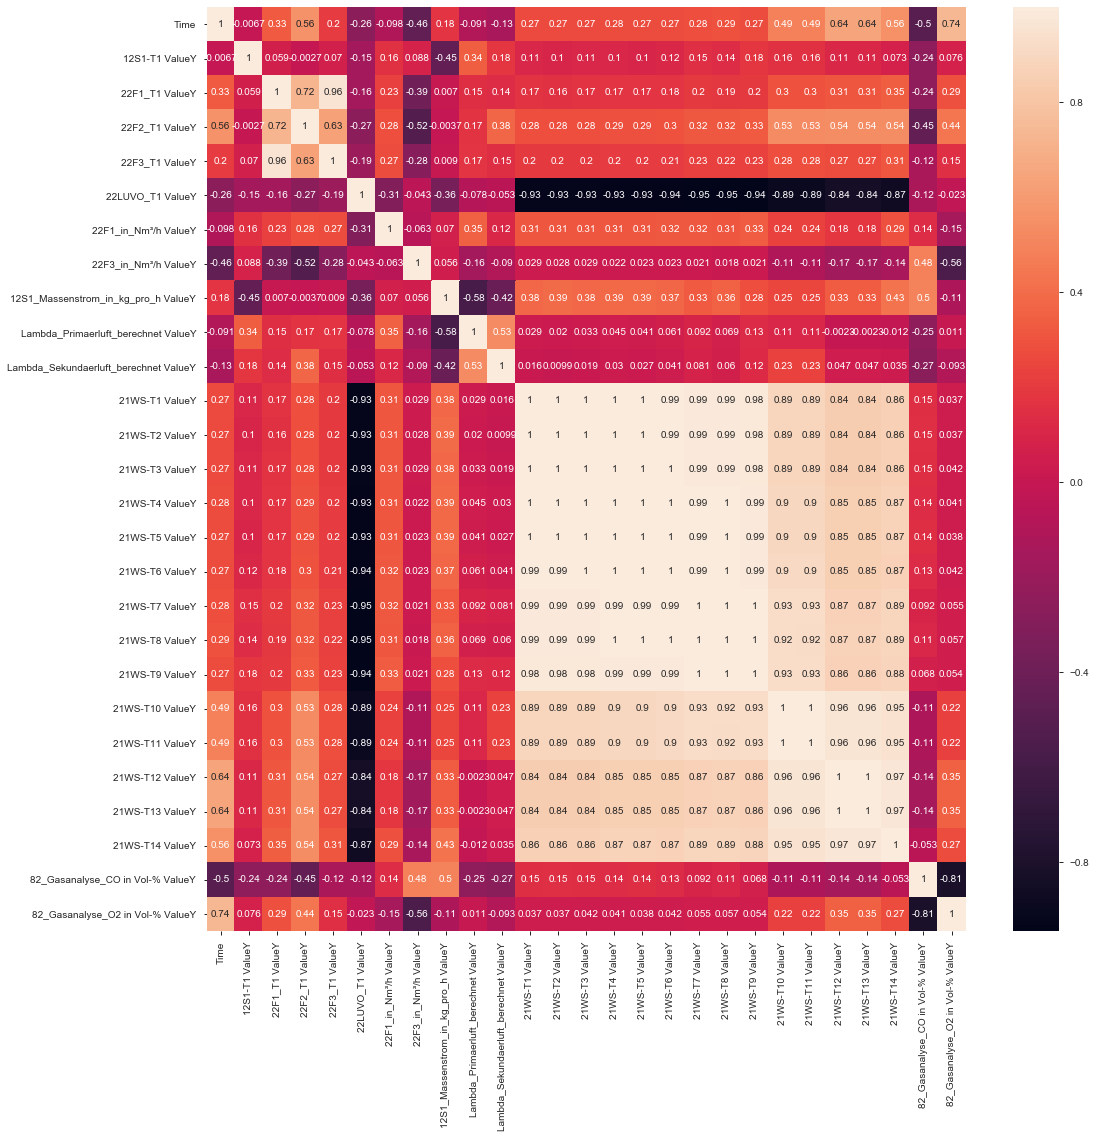

In [16]:
plt.figure(figsize = (17,17))
sns.heatmap(df.corr() , annot= True)

In [17]:
#sns.pairplot(df_features)

In [18]:
df.corr()[df.corr() >.5].reset_index()

,index,Time,12S1-T1 ValueY,22F1_T1 ValueY,22F2_T1 ValueY,22F3_T1 ValueY,22LUVO_T1 ValueY,22F1_in_Nm³/h ValueY,22F3_in_Nm³/h ValueY,12S1_Massenstrom_in_kg_pro_h ValueY,...,21WS-T7 ValueY,21WS-T8 ValueY,21WS-T9 ValueY,21WS-T10 ValueY,21WS-T11 ValueY,21WS-T12 ValueY,21WS-T13 ValueY,21WS-T14 ValueY,82_Gasanalyse_CO in Vol-% ValueY,82_Gasanalyse_O2 in Vol-% ValueY
0,Time,1.000000,NaN,NaN,0.561378,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.643099,0.643127,0.557790,NaN,0.740696
1,12S1-T1 ValueY,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22F1_T1 ValueY,NaN,NaN,1.000000,0.721319,0.957299,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22F2_T1 ValueY,0.561378,NaN,0.721319,1.000000,0.633733,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.531804,0.531835,0.542676,0.542672,0.538178,NaN,NaN
4,22F3_T1 ValueY,NaN,NaN,0.957299,0.633733,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,22LUVO_T1 ValueY,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,22F1_in_Nm³/h ValueY,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,22F3_in_Nm³/h ValueY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,12S1_Massenstrom_in_kg_pro_h ValueY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Lambda_Primaerluft_berechnet ValueY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
sns.set(rc={'figure.figsize':(30,30)})
sns.set(style="whitegrid")
ax = sns.boxplot(data= df_targets)

NameError: name 'df_targets' is not defined

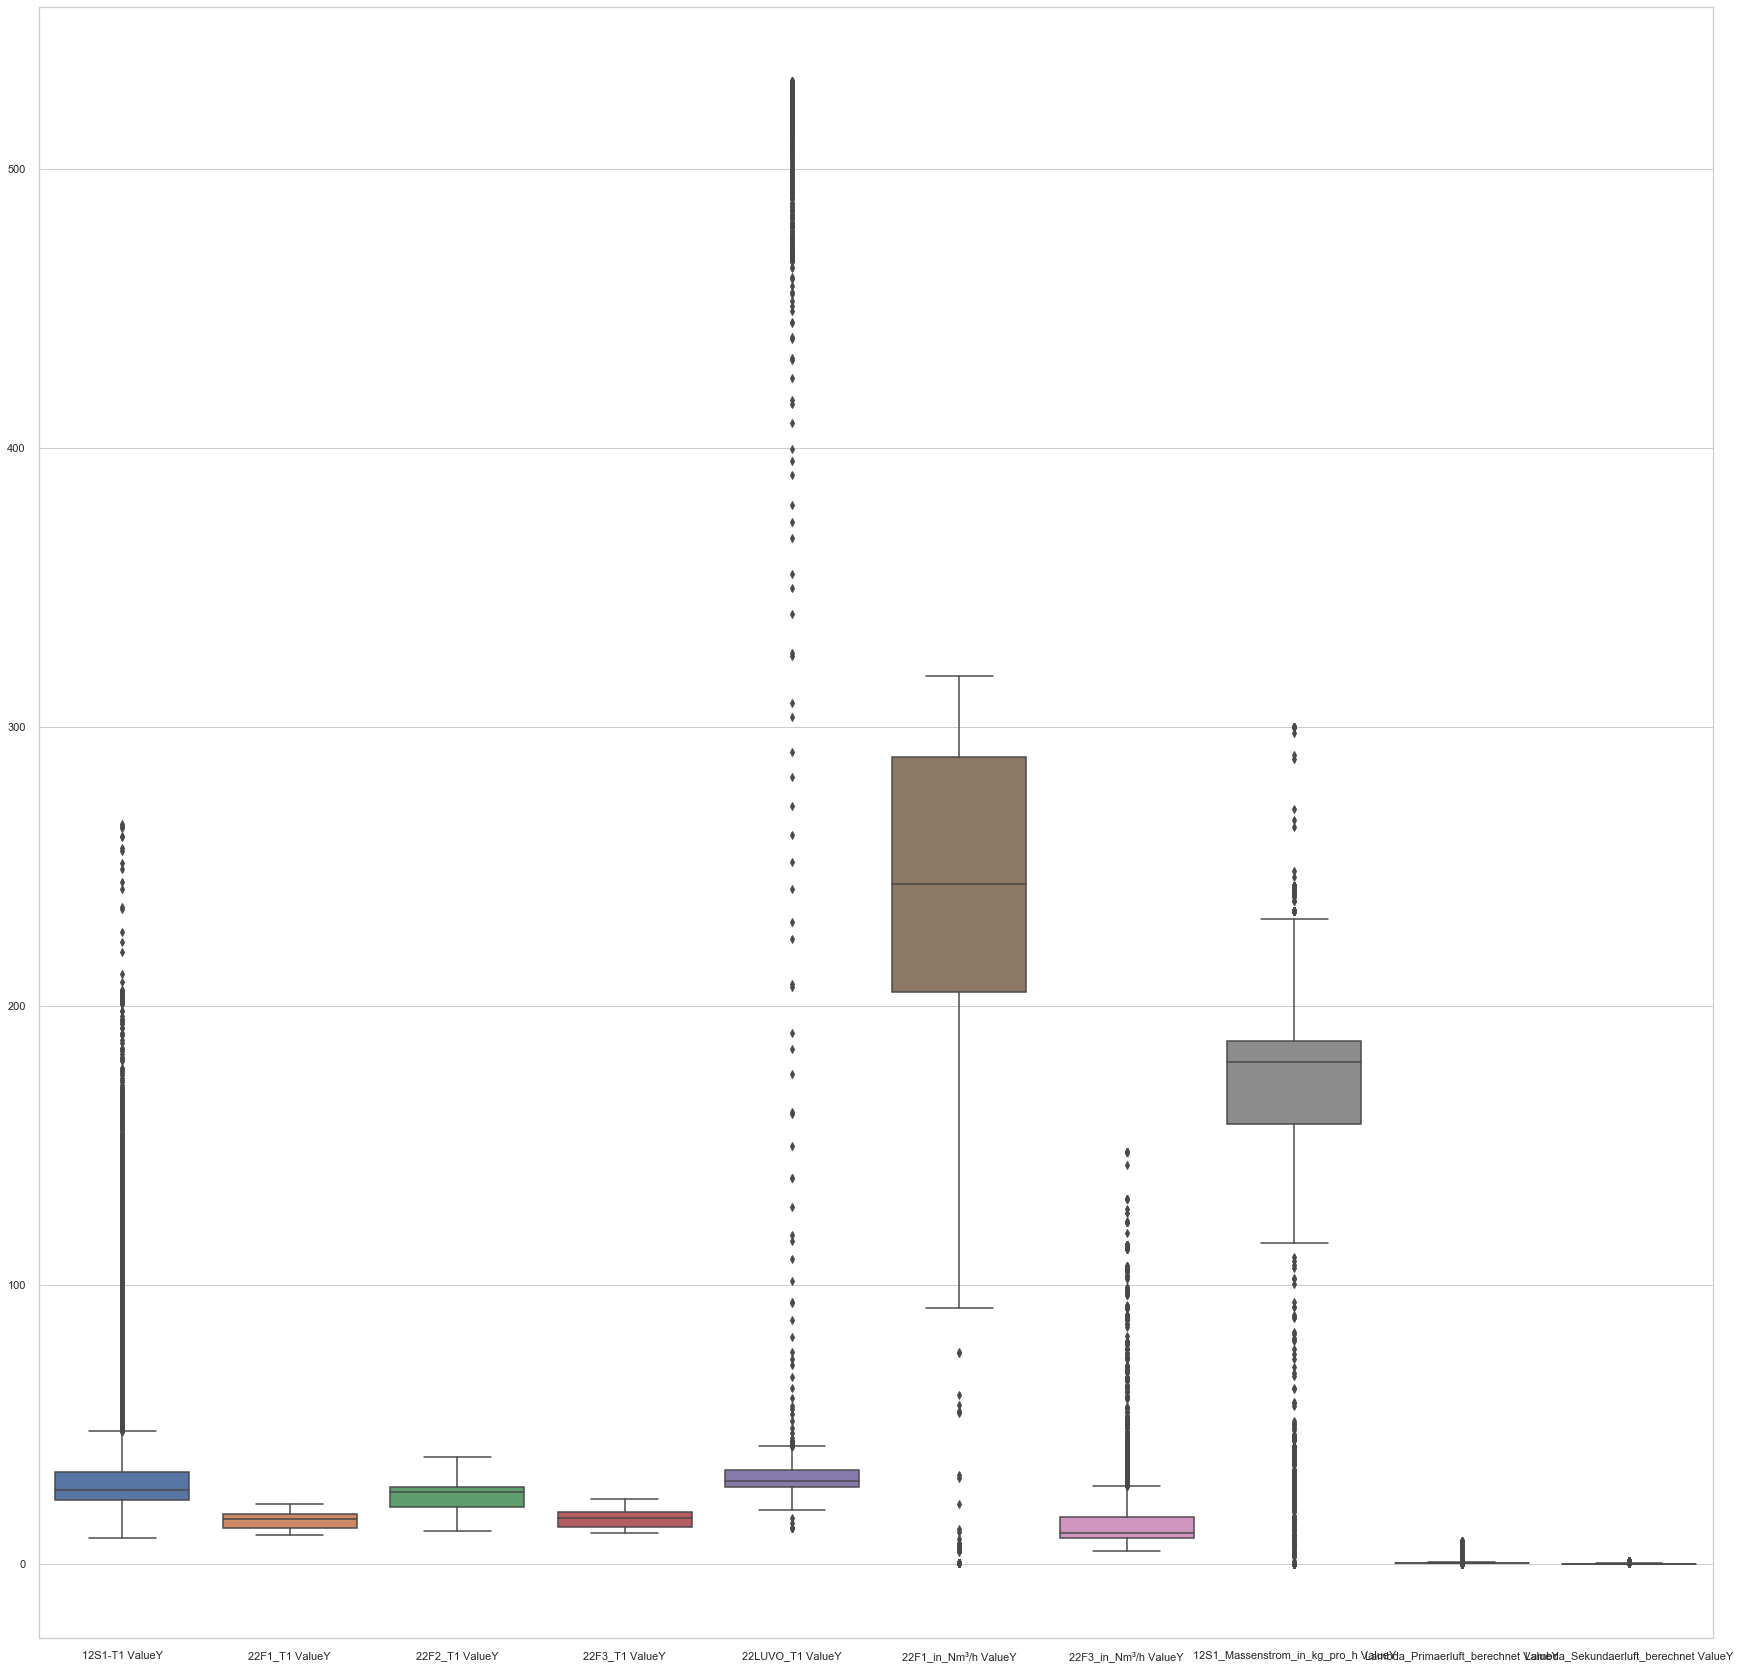

In [20]:
sns.set(rc={'figure.figsize':(30,30)})
sns.set(style="whitegrid")
ax = sns.boxplot(data= df_features.drop(["Time"] , axis=1) )

In [21]:
len(df_features)

24955

In [22]:
len(df_targets)

NameError: name 'df_targets' is not defined

In [ ]:
pandas_profiling.ProfileReport(df)

In [ ]:
pandas_profiling.ProfileReport(df_features)

In [ ]:
df.columns

In [ ]:
len(df.columns)

# Removing highly correlated variable from the features

In [23]:
del df["22F1_T1 ValueY"]

In [24]:
df.head()

,Time,12S1-T1 ValueY,22F2_T1 ValueY,22F3_T1 ValueY,22LUVO_T1 ValueY,22F1_in_Nm³/h ValueY,22F3_in_Nm³/h ValueY,12S1_Massenstrom_in_kg_pro_h ValueY,Lambda_Primaerluft_berechnet ValueY,Lambda_Sekundaerluft_berechnet ValueY,...,21WS-T7 ValueY,21WS-T8 ValueY,21WS-T9 ValueY,21WS-T10 ValueY,21WS-T11 ValueY,21WS-T12 ValueY,21WS-T13 ValueY,21WS-T14 ValueY,82_Gasanalyse_CO in Vol-% ValueY,82_Gasanalyse_O2 in Vol-% ValueY
0,1,15.933334,17.666667,17.2,16.520001,0.163060,22.512803,0.0,0.0,0.0,...,24.266667,23.853334,23.800000,29.866668,29.866668,30.500002,30.833335,21.966667,0.021564,20.965331
1,2,9.400001,11.960000,11.2,13.000000,0.166406,13.967621,0.0,0.0,0.0,...,15.400001,15.000000,15.200000,16.400000,16.400000,16.300001,16.700001,13.220000,0.024534,20.904316
2,3,9.400001,11.826667,11.2,12.906667,0.166407,13.967621,0.0,0.0,0.0,...,15.420000,15.000000,15.200000,16.400000,16.400000,16.300001,16.700001,13.200000,0.024914,20.908484
3,4,9.400001,11.806667,11.2,12.900001,0.166396,13.967621,0.0,0.0,0.0,...,15.433334,15.000000,15.200000,16.400000,16.400000,16.300001,16.700001,13.200000,0.025413,20.909970
4,5,9.400001,11.800000,11.2,12.900001,30.754719,13.967621,0.0,0.0,0.0,...,15.453334,14.926667,15.106667,16.400000,16.400000,16.300001,16.700001,13.233333,0.023842,20.913345


In [25]:
len(df)

24955

# Train and Test split , using sequential split method

In [26]:
df_train = df.iloc[0:12500 , :]

In [27]:
len(df_train)

12500

In [28]:
len(df_train.columns)

26

In [29]:
df_train.shape

(12500, 26)

In [30]:
df_test = df.iloc[12500:len(df) , :]

In [31]:
df_test.head()

,Time,12S1-T1 ValueY,22F2_T1 ValueY,22F3_T1 ValueY,22LUVO_T1 ValueY,22F1_in_Nm³/h ValueY,22F3_in_Nm³/h ValueY,12S1_Massenstrom_in_kg_pro_h ValueY,Lambda_Primaerluft_berechnet ValueY,Lambda_Sekundaerluft_berechnet ValueY,...,21WS-T7 ValueY,21WS-T8 ValueY,21WS-T9 ValueY,21WS-T10 ValueY,21WS-T11 ValueY,21WS-T12 ValueY,21WS-T13 ValueY,21WS-T14 ValueY,82_Gasanalyse_CO in Vol-% ValueY,82_Gasanalyse_O2 in Vol-% ValueY
12500,12501,70.486667,24.200001,15.5,30.820001,305.839174,7.822091,22.486723,3.444779,0.132855,...,831.273336,826.140011,841.933350,842.886674,843.000000,832.213354,832.460014,665.233354,0.060662,18.534839
12501,12502,70.360002,24.193334,15.5,30.853334,305.902622,7.851972,22.486723,3.444476,0.117645,...,830.900012,825.706673,840.920011,842.433350,842.606681,831.633346,831.866683,664.360022,0.060127,18.536225
12502,12503,70.173334,24.113334,15.5,30.886666,305.791638,7.722542,22.486723,3.443334,0.097230,...,830.506677,824.766683,839.646684,841.373348,841.526676,830.773344,831.020011,664.493355,0.070027,18.156508
12503,12504,69.993333,24.100000,15.5,30.886666,305.771242,7.806241,22.486723,3.443958,0.136257,...,830.460014,824.220011,838.846688,841.153357,841.273340,831.240015,831.446672,665.840019,0.082828,17.141712
12504,12505,69.693334,24.100000,15.5,30.800001,305.857520,7.714253,22.486723,3.442913,0.119206,...,830.286682,823.893351,837.473348,841.133341,841.293343,831.466683,831.726681,663.346680,0.065780,18.173381


In [32]:
df.columns

Index(['Time', '12S1-T1 ValueY', '22F2_T1 ValueY', '22F3_T1 ValueY',
       '22LUVO_T1 ValueY', '22F1_in_Nm³/h ValueY', '22F3_in_Nm³/h ValueY',
       '12S1_Massenstrom_in_kg_pro_h ValueY',
       'Lambda_Primaerluft_berechnet ValueY',
       'Lambda_Sekundaerluft_berechnet ValueY', '21WS-T1 ValueY',
       '21WS-T2 ValueY', '21WS-T3 ValueY', '21WS-T4 ValueY', '21WS-T5 ValueY',
       '21WS-T6 ValueY', '21WS-T7 ValueY', '21WS-T8 ValueY', '21WS-T9 ValueY',
       '21WS-T10 ValueY', '21WS-T11 ValueY', '21WS-T12 ValueY',
       '21WS-T13 ValueY', '21WS-T14 ValueY',
       '82_Gasanalyse_CO in Vol-% ValueY', '82_Gasanalyse_O2 in Vol-% ValueY'],
      dtype='object')

In [33]:
len(df_train.columns)

26

In [34]:
df_train.head()

,Time,12S1-T1 ValueY,22F2_T1 ValueY,22F3_T1 ValueY,22LUVO_T1 ValueY,22F1_in_Nm³/h ValueY,22F3_in_Nm³/h ValueY,12S1_Massenstrom_in_kg_pro_h ValueY,Lambda_Primaerluft_berechnet ValueY,Lambda_Sekundaerluft_berechnet ValueY,...,21WS-T7 ValueY,21WS-T8 ValueY,21WS-T9 ValueY,21WS-T10 ValueY,21WS-T11 ValueY,21WS-T12 ValueY,21WS-T13 ValueY,21WS-T14 ValueY,82_Gasanalyse_CO in Vol-% ValueY,82_Gasanalyse_O2 in Vol-% ValueY
0,1,15.933334,17.666667,17.2,16.520001,0.163060,22.512803,0.0,0.0,0.0,...,24.266667,23.853334,23.800000,29.866668,29.866668,30.500002,30.833335,21.966667,0.021564,20.965331
1,2,9.400001,11.960000,11.2,13.000000,0.166406,13.967621,0.0,0.0,0.0,...,15.400001,15.000000,15.200000,16.400000,16.400000,16.300001,16.700001,13.220000,0.024534,20.904316
2,3,9.400001,11.826667,11.2,12.906667,0.166407,13.967621,0.0,0.0,0.0,...,15.420000,15.000000,15.200000,16.400000,16.400000,16.300001,16.700001,13.200000,0.024914,20.908484
3,4,9.400001,11.806667,11.2,12.900001,0.166396,13.967621,0.0,0.0,0.0,...,15.433334,15.000000,15.200000,16.400000,16.400000,16.300001,16.700001,13.200000,0.025413,20.909970
4,5,9.400001,11.800000,11.2,12.900001,30.754719,13.967621,0.0,0.0,0.0,...,15.453334,14.926667,15.106667,16.400000,16.400000,16.300001,16.700001,13.233333,0.023842,20.913345


# Creating batch size

In [35]:
lot_size = 10

# sample , timesteps , number of feature 

In [36]:
# # from sklearn.preprocessing import MinMaxScaler
# # sc = MinMaxScaler(feature_range = (0, 1))
# # training_set_scaled = sc.fit_transform(df_train)


# training_set_scaled = np.array(df_train)
# # Creating a data structure with 60 timesteps and 1 output
# X_train = []
# y_train = []
# for i in range(lot_size, len(df_train)):
#     X_train.append(training_set_scaled[i-lot_size:i, 1:10])
#     y_train.append(training_set_scaled[i, 10:len(df_train)])
# X_train, y_train = np.array(X_train), np.array(y_train)

# # Reshaping
# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 9))

In [37]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(df_train)

training_set_scaled = np.array(training_set_scaled)
#training_set_scaled = np.array(training_set_scaled )
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(lot_size, len(df_train)):
    X_train.append(training_set_scaled[i-lot_size:i, :])
    y_train.append(training_set_scaled[i, :])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 26))

In [38]:
# # from sklearn.preprocessing import MinMaxScaler
# # sc = MinMaxScaler(feature_range = (0, 1))
# # test_set_scaled = sc.fit_transform(df_test)


# test_set_scaled = np.array(df_test)
# # Creating a data structure with 60 timesteps and 1 output
# X_test = []
# y_test = []
# for i in range(lot_size, len(df_test)):
#     X_test.append(test_set_scaled[i-lot_size:i, 1:10])
#     y_test.append(test_set_scaled[i, 10:len(df_test)])
# X_test, y_test = np.array(X_test), np.array(y_test)

# # Reshaping
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 9))

In [39]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
test_set_scaled = sc.fit_transform(df_test)


test_set_scaled = np.array(test_set_scaled)
# Creating a data structure with 60 timesteps and 1 output
X_test = []
y_test = []
for i in range(lot_size, len(df_test)):
    X_test.append(test_set_scaled[i-lot_size:i, :])
    y_test.append(test_set_scaled[i, :])
X_test, y_test = np.array(X_test), np.array(y_test)

# Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 26))

In [40]:
X_train.shape

(12490, 10, 26)

In [41]:
X_test.shape

(12445, 10, 26)

In [42]:
#X_train

In [43]:
y_train.shape

(12490, 26)

In [44]:
import mxnet as mx
    
from mxnet import gluon , nd , autograd

from mxnet.gluon import nn



#  Bidirectional LSTM unit coupled with GRU units

In [45]:
context = mx.cpu()


In [46]:
model = mx.gluon.nn.Sequential()
with model.name_scope():
    #model.add(mx.gluon.rnn.LSTM(10 , num_layers =2 , input_size =1 ))
    #model.add(mx.gluon.rnn.LSTM(5 , bidirectional = True , num_layers =1  ))
    model.add(mx.gluon.rnn.LSTM(20 ,bidirectional = True, num_layers =1  ))
    #model.add(mx.gluon.nn.Dense(324,activation='relu' ))
    #model.add(mx.gluon.nn.Dense(164,activation='relu' ))
    model.add(mx.gluon.nn.Dense(67,activation='relu'))
    model.add(mx.gluon.nn.Dense(32,activation='relu'))
    model.add(mx.gluon.nn.Dense(26 ))

In [47]:
model.collect_params().initialize(mx.init.Xavier() , ctx= context)

In [48]:
trainer = gluon.Trainer(model.collect_params(), 'adam',
                            {'learning_rate': 0.03})


In [49]:
L = gluon.loss.L2Loss()

In [50]:
def evaluate_accuracy(data_iterator , model , L):
    
    loss_avg = 0.
    for i , (data,label) in enumerate(data_iterator):
        
        data = data.as_in_context(context).reshape((-1 ,lot_size , 26))
        label = label.as_in_context(context).reshape((-1, 1, 26))
        output = model(data)
        
        loss = L(output , label)
        loss_avg = (loss_avg*i+nd.mean(loss).asscalar())/(i+1)
        
    return loss_avg

In [51]:
batch_size1 = len(X_train)
batch_size_test = len(X_test)

training_data_batch = mx.gluon.data.DataLoader(gluon.data.ArrayDataset(nd.array(X_train) , nd.array(y_train)) ,
                                               batch_size=batch_size1 , shuffle= False)
validation_data_batches = mx.gluon.data.DataLoader(gluon.data.ArrayDataset(nd.array(X_test) , nd.array(y_test)) ,
                                                batch_size=batch_size_test , shuffle= False)

In [52]:
metric = mx.metric.Accuracy()

In [53]:
#feature_count =9
epochs = 185
training_mse = []
validation_mse = []
loss_score =[]
outs = []
labs =[]
accuracy = []
for epoch in range(epochs):
    print("Epoch" , str(epoch+1))
    for i, (data,label) in enumerate(training_data_batch):
        data = data.as_in_context(context).reshape((-1, lot_size, 26))
        label = label.as_in_context(context).reshape((-1, 1, 26))

        with autograd.record():
            output = model(data)
            loss = L(output, label)
            
            #print(label.shape)
            
        loss.backward()
        trainer.step(batch_size1)
        
    loss_score.append(np.sum(loss.asnumpy()))
    outs.append(np.sum(output.asnumpy()))
    labs.append(np.sum(label.asnumpy()))
    
    labr = label.reshape(-1,26)
    
    label_actual = sc.inverse_transform(labr.asnumpy())
    output_actual = sc.inverse_transform(output.asnumpy())
    
    accs = (1- abs((np.sum(label_actual) - np.sum(output_actual)))/np.sum(label_actual))*100
    accuracy.append(accs)
    
    training_mse.append(evaluate_accuracy(training_data_batch, model, L))
    validation_mse.append(evaluate_accuracy(validation_data_batches, model, L))

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
Epoch 50
Epoch 51
Epoch 52
Epoch 53
Epoch 54
Epoch 55
Epoch 56
Epoch 57
Epoch 58
Epoch 59
Epoch 60
Epoch 61
Epoch 62
Epoch 63
Epoch 64
Epoch 65
Epoch 66
Epoch 67
Epoch 68
Epoch 69
Epoch 70
Epoch 71
Epoch 72
Epoch 73
Epoch 74
Epoch 75
Epoch 76
Epoch 77
Epoch 78
Epoch 79
Epoch 80
Epoch 81
Epoch 82
Epoch 83
Epoch 84
Epoch 85
Epoch 86
Epoch 87
Epoch 88
Epoch 89
Epoch 90
Epoch 91
Epoch 92
Epoch 93
Epoch 94
Epoch 95
Epoch 96
Epoch 97
Epoch 98
Epoch 99
Epoch 100
Epoch 101
Epoch 102
Epoch 103
Epoch 104
Epoch 105
Epoch 106
Epoch 107
Epoch 108
Epoch 109
Epoch 110
Epoch 11

In [55]:
val_loss = pd.Series(validation_mse)

In [59]:
acc_out = pd.Series(accuracy)

In [60]:
acc_out.to_csv(r"D:\Python\upwork\Gas Chamber Project\output\acc_loss33.csv")

C:\Users\ramda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [ ]:
sc.inverse_transform(output.asnumpy())

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(7 , 7))
plt.plot(accuracy)

plt.xlabel("Number of Epoch")
plt.ylabel("Loss")
plt.title("Accuracy Curve")

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(7 , 7))
plt.plot(loss_score)

plt.xlabel("Number of Epoch")
plt.ylabel("Loss")
plt.title("Loss")

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10 , 10))
plt.plot(training_mse)
plt.plot(validation_mse)
plt.title("Training MSE vs Validation MSE")

In [ ]:
output.shape

In [ ]:
output.asnumpy()

In [ ]:
X_test.shape

In [ ]:
y_test

# Prediction and converting to Dataframe

In [ ]:
predicted  = model(nd.array(X_test))

In [ ]:
predicted.shape

In [ ]:
predicted = predicted.asnumpy()

# Data Inverse Transform

In [ ]:
predicted2 = sc.inverse_transform(predicted)

In [ ]:
predicted_df = pd.DataFrame(predicted2)

In [ ]:
#predicted_df = pd.DataFrame(predicted)

In [ ]:
df_train.columns

In [ ]:
#predicted_df = predicted_df.drop([0], axis=1)

In [ ]:
len(df.columns)
#"22F1_T1 ValueY"

In [ ]:
predicted_df.columns = ['Time', '12S1-T1 ValueY', '22F2_T1 ValueY', '22F3_T1 ValueY',
       '22LUVO_T1 ValueY', '22F1_in_Nm³/h ValueY', '22F3_in_Nm³/h ValueY',
       '12S1_Massenstrom_in_kg_pro_h ValueY',
       'Lambda_Primaerluft_berechnet ValueY',
       'Lambda_Sekundaerluft_berechnet ValueY', '21WS-T1 ValueY',
       '21WS-T2 ValueY', '21WS-T3 ValueY', '21WS-T4 ValueY', '21WS-T5 ValueY',
       '21WS-T6 ValueY', '21WS-T7 ValueY', '21WS-T8 ValueY', '21WS-T9 ValueY',
       '21WS-T10 ValueY', '21WS-T11 ValueY', '21WS-T12 ValueY',
       '21WS-T13 ValueY', '21WS-T14 ValueY',
       '82_Gasanalyse_CO in Vol-% ValueY', '82_Gasanalyse_O2 in Vol-% ValueY']

In [ ]:
del predicted_df['Time']

In [ ]:
predicted_df.head(10)

In [ ]:
# predicted_df.columns = [  '21WS-T1_ValueY',
#        '21WS-T2_ValueY', '21WS-T3_ValueY', '21WS-T4_ValueY', '21WS-T5_ValueY',
#        '21WS-T6_ValueY', '21WS-T7_ValueY', '21WS-T8_ValueY', '21WS-T9_ValueY',
#        '21WS-T10_ValueY', '21WS-T11_ValueY', '21WS-T12_ValueY',
#        '21WS-T13_ValueY', '21WS-T14_ValueY',
#        '82_Gasanalyse_CO_in_Vol-%_ValueY', '82_Gasanalyse_O2_in_Vol-%_ValueY']

In [ ]:
predicted_df.columns

In [ ]:
predicted_df_label = predicted_df[['21WS-T1 ValueY',
       '21WS-T2 ValueY', '21WS-T3 ValueY', '21WS-T4 ValueY', '21WS-T5 ValueY',
       '21WS-T6 ValueY', '21WS-T7 ValueY', '21WS-T8 ValueY', '21WS-T9 ValueY',
       '21WS-T10 ValueY', '21WS-T11 ValueY', '21WS-T12 ValueY',
       '21WS-T13 ValueY', '21WS-T14 ValueY',
       '82_Gasanalyse_CO in Vol-% ValueY', '82_Gasanalyse_O2 in Vol-% ValueY']]

# Test Data inverse Transform

In [ ]:
y_test2 = sc.inverse_transform(y_test)

In [ ]:
y_test_df = pd.DataFrame(y_test2)

In [ ]:
#y_test_df = y_test_df.drop([0],axis=1)

In [ ]:
y_test_df.columns = ['Time', '12S1-T1 ValueY', '22F2_T1 ValueY', '22F3_T1 ValueY',
       '22LUVO_T1 ValueY', '22F1_in_Nm³/h ValueY', '22F3_in_Nm³/h ValueY',
       '12S1_Massenstrom_in_kg_pro_h ValueY',
       'Lambda_Primaerluft_berechnet ValueY',
       'Lambda_Sekundaerluft_berechnet ValueY', '21WS-T1 ValueY',
       '21WS-T2 ValueY', '21WS-T3 ValueY', '21WS-T4 ValueY', '21WS-T5 ValueY',
       '21WS-T6 ValueY', '21WS-T7 ValueY', '21WS-T8 ValueY', '21WS-T9 ValueY',
       '21WS-T10 ValueY', '21WS-T11 ValueY', '21WS-T12 ValueY',
       '21WS-T13 ValueY', '21WS-T14 ValueY',
       '82_Gasanalyse_CO in Vol-% ValueY', '82_Gasanalyse_O2 in Vol-% ValueY']

In [ ]:
del y_test_df['Time']

In [ ]:
y_test_df.head()

In [ ]:
# '21WS-T1 ValueY',
#        '21WS-T2 ValueY', '21WS-T3 ValueY', '21WS-T4 ValueY', '21WS-T5 ValueY',
#        '21WS-T6 ValueY', '21WS-T7 ValueY', '21WS-T8 ValueY', '21WS-T9 ValueY',
#        '21WS-T10 ValueY', '21WS-T11 ValueY', '21WS-T12 ValueY',
#        '21WS-T13 ValueY', '21WS-T14 ValueY',
#        '82_Gasanalyse_CO in Vol-% ValueY', '82_Gasanalyse_O2 in Vol-% ValueY'

In [ ]:
y_test_df_label = y_test_df.iloc[:,9:25]

In [ ]:
from sklearn import metrics

In [ ]:
predicted_df_label.to_excel(r"D:\Python\upwork\Gas Chamber Project\output\Predictions.xlsx")

# MSE for each Labels

In [ ]:

k = 10
m =11
for i in range(0 , len(y_test_df.iloc[:,10:26].columns)):
    print(metrics.mean_squared_error(y_test_df.iloc[:,k:m] , predicted_df.iloc[:,k:m]))
    k +=1
    m +=1

In [ ]:
# k = 0
# m =1
# for i in range(0 , len(y_test_df.columns)):
#     print(metrics.mean_squared_error(y_test_df_label.iloc[:,k:m] , predicted_df_label.iloc[:,k:m]))
#     k +=1
#     m +=1

In [ ]:
# %matplotlib inline
# plt.figure(figsize = (10 , 10))
# plt.plot(y_test_df["82_Gasanalyse_O2 in Vol-% ValueY"], color = 'red', label = 'Real 82_Gasanalyse_O2 in Vol-% ValueY')
# plt.plot(predicted_df["82_Gasanalyse_O2 in Vol-% ValueY"], color = 'blue', label = 'Predicted 82_Gasanalyse_O2 in Vol-% ValueY')
# plt.title(' Prediction 82_Gasanalyse_O2 in Vol-% ValueY')
# plt.xlabel('Time')
# plt.ylabel('value')
# plt.ylim(0, 25)
# plt.legend()
# plt.show()

In [ ]:
y_test_df_label.head()

In [ ]:
len(predicted_df.columns)

In [ ]:
predicted_df_label['21WS-T1 ValueY'].tail(10)

In [ ]:
y_test_df_label['21WS-T1 ValueY'].tail(10)

In [ ]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(nrows=2, 
                       ncols=1, figsize = (20,20))
k = 1
m =0
for  j in ax:
        
    #for j in i:
        
    i = 0
    h = 0
    
    j.plot(y_test_df_label.iloc[:,m:k], color = 'red', label = ['Actual' ,  y_test_df_label.iloc[:,m:k].columns[0] ] )
    j.plot(predicted_df_label.iloc[:,m:k], color = 'blue', label = ['Predicted',  y_test_df_label.iloc[:,m:k].columns[0] ]   )
        #j.title(' Prediction 82_Gasanalyse_O2 in Vol-% ValueY')
        #j.xlabel('Time')
        #j.ylabel('value')
        #j.ylim(0, 25)
    j.set_title(("Predicted" ,predicted_df_label.iloc[:,m:k].columns[0] , "VS" , "Actual" , y_test_df_label.iloc[:,m:k].columns[0] ), fontsize = 20)
    j.legend(fontsize = 20)
    max_value = np.max(np.array(y_test_df_label.iloc[:,m:k]) )
    min_value = np.min(np.array(y_test_df_label.iloc[:,m:k]) )
        
        
        
    
    while i < len(np.array(y_test_df_label.iloc[:,m:k])):

        fr = float(np.array(y_test_df_label.iloc[i:(i+1),m:k]).reshape(-1,))
        
        i = i+500
        j.annotate(str(int(fr)) , xy= (i , fr)  ,fontsize = 14 ,arrowprops=dict(facecolor='red', shrink=0.05))
        #print(i , fr)
    
    
    while h < len(np.array(predicted_df_label.iloc[:,m:k])):

        fr = float(np.array(predicted_df_label.iloc[h:(h+1),m:k]).reshape(-1,))
        
        h = h+500
        j.annotate(str(int(fr)) , xy= (h , fr)  ,fontsize = 14 ,arrowprops=dict(facecolor='blue', shrink=0.05))
        #print(h , fr)
                
        
        
        
        
        
        
    #print(type(max_value))
    j.set_ylim((min_value -50  , max_value +50  ) )
    j.set_xlabel("Time" , fontsize = 20 )
    j.set_ylabel(y_test_df.iloc[:,m:k].columns[0] , fontsize = 20)
        #j.set_xticklabels(labels = [200 , 1000 , 2000, 5000] , fontsize =20)
    j.tick_params(axis='both', which='major', labelsize=20)
    k +=1
    m +=1
    

In [ ]:

plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(nrows=2, 
                       ncols=1, figsize = (20,20))
k = 3
m =2
for  j in ax:
        
    #for j in i:
    
    i = 0
    h = 0
        
    j.plot(y_test_df_label.iloc[:,m:k], color = 'red', label = ['Actual' ,  y_test_df_label.iloc[:,m:k].columns[0] ] )
    j.plot(predicted_df_label.iloc[:,m:k], color = 'blue', label = ['Predicted',  y_test_df_label.iloc[:,m:k].columns[0] ]   )
        #j.title(' Prediction 82_Gasanalyse_O2 in Vol-% ValueY')
        #j.xlabel('Time')
        #j.ylabel('value')
        #j.ylim(0, 25)
    j.set_title(("Predicted" ,predicted_df_label.iloc[:,m:k].columns[0] , "VS" , "Actual" , y_test_df_label.iloc[:,m:k].columns[0] ), fontsize = 20)
    j.legend(fontsize = 20)
    max_value = np.max(np.array(y_test_df_label.iloc[:,m:k]) )
    min_value = np.min(np.array(y_test_df_label.iloc[:,m:k]) )
    
    
    while i < len(np.array(y_test_df_label.iloc[:,m:k])):

        fr = float(np.array(y_test_df_label.iloc[i:(i+1),m:k]).reshape(-1,))
        
        i = i+500
        j.annotate(str(int(fr)) , xy= (i , fr)  ,fontsize = 14 ,arrowprops=dict(facecolor='red', shrink=0.05))
        #print(i , fr)
    
    
    while h < len(np.array(predicted_df_label.iloc[:,m:k])):

        fr = float(np.array(predicted_df_label.iloc[h:(h+1),m:k]).reshape(-1,))
        
        h = h+500
        j.annotate(str(int(fr)) , xy= (h , fr)  ,fontsize = 14 ,arrowprops=dict(facecolor='blue', shrink=0.05))
        #print(h , fr)
        
        
    #print(type(max_value))
    j.set_ylim((min_value -50  , max_value +50  ) )
    j.set_xlabel("Time" , fontsize = 20 )
    j.set_ylabel(y_test_df.iloc[:,m:k].columns[0] , fontsize = 20)
        #j.set_xticklabels(labels = [200 , 1000 , 2000, 5000] , fontsize =20)
    j.tick_params(axis='both', which='major', labelsize=20)
    k +=1
    m +=1
    
    

In [ ]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(nrows=2, 
                       ncols=1, figsize = (20,20))
k = 5
m =4
for  j in ax:
        
    #for j in i:
    i = 0
    h = 0
        
    j.plot(y_test_df_label.iloc[:,m:k], color = 'red', label = ['Actual' ,  y_test_df_label.iloc[:,m:k].columns[0] ] )
    j.plot(predicted_df_label.iloc[:,m:k], color = 'blue', label = ['Predicted',  y_test_df_label.iloc[:,m:k].columns[0] ]   )
        #j.title(' Prediction 82_Gasanalyse_O2 in Vol-% ValueY')
        #j.xlabel('Time')
        #j.ylabel('value')
        #j.ylim(0, 25)
    j.set_title(("Predicted" ,predicted_df_label.iloc[:,m:k].columns[0] , "VS" , "Actual" , y_test_df_label.iloc[:,m:k].columns[0] ), fontsize = 20)
    j.legend(fontsize = 20)
    max_value = np.max(np.array(y_test_df_label.iloc[:,m:k]) )
    min_value = np.min(np.array(y_test_df_label.iloc[:,m:k]) )
    
    
    
    while i < len(np.array(y_test_df_label.iloc[:,m:k])):

        fr = float(np.array(y_test_df_label.iloc[i:(i+1),m:k]).reshape(-1,))
        
        i = i+500
        j.annotate(str(int(fr)) , xy= (i , fr)  ,fontsize = 14 ,arrowprops=dict(facecolor='red', shrink=0.05))
        #print(i , fr)
    
    
    while h < len(np.array(predicted_df_label.iloc[:,m:k])):

        fr = float(np.array(predicted_df_label.iloc[h:(h+1),m:k]).reshape(-1,))
        
        h = h+500
        j.annotate(str(int(fr)) , xy= (h , fr)  ,fontsize = 14 ,arrowprops=dict(facecolor='blue', shrink=0.05))
        #print(h , fr)
        
        
        
        
    #print(type(max_value))
    j.set_ylim((min_value -50  , max_value +50  ) )
    j.set_xlabel("Time" , fontsize = 20 )
    j.set_ylabel(y_test_df.iloc[:,m:k].columns[0] , fontsize = 20)
        #j.set_xticklabels(labels = [200 , 1000 , 2000, 5000] , fontsize =20)
    j.tick_params(axis='both', which='major', labelsize=20)
    k +=1
    m +=1
    

In [ ]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(nrows=2, 
                       ncols=1, figsize = (20,20))
k = 7
m =6
for  j in ax:
        
    i = 0
    h = 0
        
    j.plot(y_test_df_label.iloc[:,m:k], color = 'red', label = ['Actual' ,  y_test_df_label.iloc[:,m:k].columns[0] ] )
    j.plot(predicted_df_label.iloc[:,m:k], color = 'blue', label = ['Predicted',  y_test_df_label.iloc[:,m:k].columns[0] ]   )
        #j.title(' Prediction 82_Gasanalyse_O2 in Vol-% ValueY')
        #j.xlabel('Time')
        #j.ylabel('value')
        #j.ylim(0, 25)
    j.set_title(("Predicted" ,predicted_df_label.iloc[:,m:k].columns[0] , "VS" , "Actual" , y_test_df_label.iloc[:,m:k].columns[0] ), fontsize = 20)
    j.legend(fontsize = 20)
    max_value = np.max(np.array(y_test_df_label.iloc[:,m:k]) )
    min_value = np.min(np.array(y_test_df_label.iloc[:,m:k]) )
    
    
    while i < len(np.array(y_test_df_label.iloc[:,m:k])):

        fr = float(np.array(y_test_df_label.iloc[i:(i+1),m:k]).reshape(-1,))
        
        i = i+500
        j.annotate(str(int(fr)) , xy= (i , fr)  ,fontsize = 14 ,arrowprops=dict(facecolor='red', shrink=0.05))
        #print(i , fr)
    
    
    while h < len(np.array(predicted_df_label.iloc[:,m:k])):

        fr = float(np.array(predicted_df_label.iloc[h:(h+1),m:k]).reshape(-1,))
        
        h = h+500
        j.annotate(str(int(fr)) , xy= (h , fr)  ,fontsize = 14 ,arrowprops=dict(facecolor='blue', shrink=0.05))
        #print(h , fr)
           
        
    #print(type(max_value))
    j.set_ylim((min_value -50  , max_value +50  ) )
    j.set_xlabel("Time" , fontsize = 20 )
    j.set_ylabel(y_test_df.iloc[:,m:k].columns[0] , fontsize = 20)
        #j.set_xticklabels(labels = [200 , 1000 , 2000, 5000] , fontsize =20)
    j.tick_params(axis='both', which='major', labelsize=20)
    k +=1
    m +=1
    

In [ ]:
# i = 0
# while i < len(np.array(y_test_df_label.iloc[:,8:9])):
    
#     print(i)
#     print(int(np.array(y_test_df_label.iloc[i:(i+1),8:9]).reshape(-1,)))
#     i = i+500

In [ ]:
np.array(y_test_df_label.iloc[:,8:9]).reshape(-1,).shape

In [ ]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(nrows=2, 
                       ncols=1, figsize = (20,20))
k = 9
m =8



for  j in ax:
    
    i = 0
    h = 0
        
    #for j in i:
        
    j.plot(y_test_df_label.iloc[:,m:k], color = 'red', label = ['Actual' ,  y_test_df_label.iloc[:,m:k].columns[0] ] )
    j.plot(predicted_df_label.iloc[:,m:k], color = 'blue', label = ['Predicted',  y_test_df_label.iloc[:,m:k].columns[0] ]   )
        #j.title(' Prediction 82_Gasanalyse_O2 in Vol-% ValueY')
        #j.xlabel('Time')
        #j.ylabel('value')
        #j.ylim(0, 25)
    j.set_title(("Predicted" ,predicted_df_label.iloc[:,m:k].columns[0] , "VS" , "Actual" , y_test_df_label.iloc[:,m:k].columns[0] ), fontsize = 20)
    j.legend(fontsize = 20)
    max_value = np.max(np.array(y_test_df_label.iloc[:,m:k]) )
    min_value = np.min(np.array(y_test_df_label.iloc[:,m:k]) )
   
    while i < len(np.array(y_test_df_label.iloc[:,m:k])):

        fr = float(np.array(y_test_df_label.iloc[i:(i+1),m:k]).reshape(-1,))
        
        i = i+500
        j.annotate(str(int(fr)) , xy= (i , fr)  ,fontsize = 14 ,arrowprops=dict(facecolor='red', shrink=0.05))
        #print(i , fr)
    
    
    while h < len(np.array(predicted_df_label.iloc[:,m:k])):

        fr = float(np.array(predicted_df_label.iloc[h:(h+1),m:k]).reshape(-1,))
        
        h = h+500
        j.annotate(str(int(fr)) , xy= (h , fr)  ,fontsize = 14 ,arrowprops=dict(facecolor='blue', shrink=0.05))
        #print(h , fr)
        
        
        
    #print(type(max_value))
    j.set_ylim((min_value -50  , max_value +50  ) )
    j.set_xlabel("Time" , fontsize = 20 )
    j.set_ylabel(y_test_df.iloc[:,m:k].columns[0] , fontsize = 20)
        #j.set_xticklabels(labels = [200 , 1000 , 2000, 5000] , fontsize =20)
    j.tick_params(axis='both', which='major', labelsize=20)
    k +=1
    m +=1
    

In [ ]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(nrows=2, 
                       ncols=1, figsize = (20,20))
k = 11
m =10
for  j in ax:
        
    #for j in i:
    
    
    i = 0
    h = 0
        
    j.plot(y_test_df_label.iloc[:,m:k], color = 'red', label = ['Actual' ,  y_test_df_label.iloc[:,m:k].columns[0] ] )
    j.plot(predicted_df_label.iloc[:,m:k], color = 'blue', label = ['Predicted',  y_test_df_label.iloc[:,m:k].columns[0] ]   )
        #j.title(' Prediction 82_Gasanalyse_O2 in Vol-% ValueY')
        #j.xlabel('Time')
        #j.ylabel('value')
        #j.ylim(0, 25)
    j.set_title(("Predicted" ,predicted_df_label.iloc[:,m:k].columns[0] , "VS" , "Actual" , y_test_df_label.iloc[:,m:k].columns[0] ), fontsize = 20)
    j.legend(fontsize = 20)
    max_value = np.max(np.array(y_test_df_label.iloc[:,m:k]) )
    min_value = np.min(np.array(y_test_df_label.iloc[:,m:k]) )
    
    while i < len(np.array(y_test_df_label.iloc[:,m:k])):

        fr = float(np.array(y_test_df_label.iloc[i:(i+1),m:k]).reshape(-1,))
        
        i = i+500
        j.annotate(str(int(fr)) , xy= (i , fr)  ,fontsize = 14 ,arrowprops=dict(facecolor='red', shrink=0.05))
        #print(i , fr)
    
    
    while h < len(np.array(predicted_df_label.iloc[:,m:k])):

        fr = float(np.array(predicted_df_label.iloc[h:(h+1),m:k]).reshape(-1,))
        
        h = h+500
        j.annotate(str(int(fr)) , xy= (h , fr)  ,fontsize = 14 ,arrowprops=dict(facecolor='blue', shrink=0.05))
        #print(h , fr)
        
        
    #print(type(max_value))
    j.set_ylim((min_value -50  , max_value +50  ) )
    j.set_xlabel("Time" , fontsize = 20 )
    j.set_ylabel(y_test_df.iloc[:,m:k].columns[0] , fontsize = 20)
        #j.set_xticklabels(labels = [200 , 1000 , 2000, 5000] , fontsize =20)
    j.tick_params(axis='both', which='major', labelsize=20)
    k +=1
    m +=1
    

In [ ]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(nrows=2, 
                       ncols=1, figsize = (20,20))
k = 13
m =12
for  j in ax:
        
    #for j in i:
    
    
    i = 0
    h = 0
        
    j.plot(y_test_df_label.iloc[:,m:k], color = 'red', label = ['Actual' ,  y_test_df_label.iloc[:,m:k].columns[0] ] )
    j.plot(predicted_df_label.iloc[:,m:k], color = 'blue', label = ['Predicted',  y_test_df_label.iloc[:,m:k].columns[0] ]   )
        #j.title(' Prediction 82_Gasanalyse_O2 in Vol-% ValueY')
        #j.xlabel('Time')
        #j.ylabel('value')
        #j.ylim(0, 25)
    j.set_title(("Predicted" ,predicted_df_label.iloc[:,m:k].columns[0] , "VS" , "Actual" , y_test_df_label.iloc[:,m:k].columns[0] ), fontsize = 20)
    j.legend(fontsize = 20)
    max_value = np.max(np.array(y_test_df_label.iloc[:,m:k]) )
    min_value = np.min(np.array(y_test_df_label.iloc[:,m:k]) )
    
    
    while i < len(np.array(y_test_df_label.iloc[:,m:k])):

        fr = float(np.array(y_test_df_label.iloc[i:(i+1),m:k]).reshape(-1,))
        
        i = i+500
        j.annotate(str(int(fr)) , xy= (i , fr)  ,fontsize = 14 ,arrowprops=dict(facecolor='red', shrink=0.05))
        #print(i , fr)
    
    
    while h < len(np.array(predicted_df_label.iloc[:,m:k])):

        fr = float(np.array(predicted_df_label.iloc[h:(h+1),m:k]).reshape(-1,))
        
        h = h+500
        j.annotate(str(int(fr)) , xy= (h , fr)  ,fontsize = 14 ,arrowprops=dict(facecolor='blue', shrink=0.05))
        #print(h , fr)
        
    print(type(max_value))
    j.set_ylim((min_value -50  , max_value +50  ) )
    j.set_xlabel("Time" , fontsize = 20 )
    j.set_ylabel(y_test_df.iloc[:,m:k].columns[0] , fontsize = 20)
        #j.set_xticklabels(labels = [200 , 1000 , 2000, 5000] , fontsize =20)
    j.tick_params(axis='both', which='major', labelsize=20)
    k +=1
    m +=1
    

In [ ]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(nrows=2, 
                       ncols=1, figsize = (20,20))
k = 15
m =14
for  j in ax:
        
    #for j in i:
    i = 0
    h = 0
        
    j.plot(y_test_df_label.iloc[:,m:k], color = 'red', label = ['Actual' ,  y_test_df_label.iloc[:,m:k].columns[0] ] )
    j.plot(predicted_df_label.iloc[:,m:k], color = 'blue', label = ['Predicted',  y_test_df_label.iloc[:,m:k].columns[0] ]   )
        #j.title(' Prediction 82_Gasanalyse_O2 in Vol-% ValueY')
        #j.xlabel('Time')
        #j.ylabel('value')
        #j.ylim(0, 25)
    j.set_title(("Predicted" ,predicted_df_label.iloc[:,m:k].columns[0] , "VS" , "Actual" , y_test_df_label.iloc[:,m:k].columns[0] ), fontsize = 20)
    j.legend(fontsize = 20)
    max_value = np.max(np.array(y_test_df_label.iloc[:,m:k]) )
    min_value = np.min(np.array(y_test_df_label.iloc[:,m:k]) )
    
    while i < len(np.array(y_test_df_label.iloc[:,m:k])):

        fr = float(np.array(y_test_df_label.iloc[i:(i+1),m:k]).reshape(-1,))
        
        i = i+500
        j.annotate(str(int(fr)) , xy= (i , fr)  ,fontsize = 14 ,arrowprops=dict(facecolor='red', shrink=0.05))
        #print(i , fr)
    
    
    while h < len(np.array(predicted_df_label.iloc[:,m:k])):

        fr = float(np.array(predicted_df_label.iloc[h:(h+1),m:k]).reshape(-1,))
        
        h = h+500
        j.annotate(str(int(fr)) , xy= (h , fr)  ,fontsize = 14 ,arrowprops=dict(facecolor='blue', shrink=0.05))
        #print(h , fr)
        
    #print(type(max_value))
    j.set_ylim((min_value -50  , max_value +50  ) )
    j.set_xlabel("Time" , fontsize = 20 )
    j.set_ylabel(y_test_df.iloc[:,m:k].columns[0] , fontsize = 20)
        #j.set_xticklabels(labels = [200 , 1000 , 2000, 5000] , fontsize =20)
    j.tick_params(axis='both', which='major', labelsize=20)
    k +=1
    m +=1
    